## Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

### 1. Импорты

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import optimizers
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import itertools
warnings.filterwarnings('ignore')

### 2. Загрузка и подготовка данных

In [50]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

Label is 6


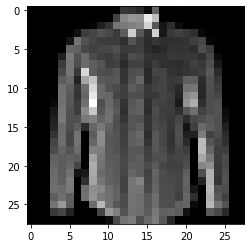

In [51]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

Чтобы было нагляднее, обращусь к описанию датасета

In [52]:
dict_labels = {
0 : 'T-shirt/top',
1 : 'Trouser',
2 : 'Pullover',
3 : 'Dress',
4 : 'Coat',
5 : 'Sandal',
6 : 'Shirt',
7 : 'Sneaker',
8 : 'Bag',
9 : 'Ankle boot'
}

Label is Sandal


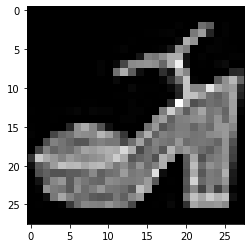

In [53]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {dict_labels[y_train_labels[ind]]}')

Теперь нормирую и вытяну признаки, и сделаю таргет бинарным

In [54]:
X_train.min(), X_train.max()

(0, 255)

In [55]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [56]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [57]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Зафиксирую рандом

In [58]:
tf.random.set_seed(1)

### 3. Подготовка архитектур моделей

Нужно подготовить двухслойную модель с разным количеством нейронов

In [59]:
models = {}
for n_neurons in (2**n for n in range(1, 10)):
    model = Sequential([
    Dense(n_neurons, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
    ])
    model_name = f'nn_2layers_{n_neurons}neurons'
    models[model_name] = model

Нужно подготовить n-слойные модели (2, 3, 5, 10 слоев) при близких размерах сети

In [60]:
for n_layers in (2, 3, 5, 10):
    model = Sequential()
    model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
    for l in range(n_layers - 2):
        model.add(Dense(20 - l, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model_name = f'nn_{n_layers}layers_50ksize'
    models[model_name] = model

Модели получились примерно одного размера. Прикол в том, что максимальное количество параметров - между входным и первым скрытым слоем из-за большого размера входного слоя.

Также подготовлю оптимизаторы

In [61]:
my_optimizers = (optimizers.gradient_descent_v2.SGD(),
                             optimizers.rmsprop_v2.RMSprop(),
                             optimizers.adam_v2.Adam())

### 4. Обучение моделей

Epoch 1/7
235/235 [==============================] - 2s 8ms/step - loss: 2.2357 - accuracy: 0.1202 - val_loss: 2.2048 - val_accuracy: 0.1281
Epoch 2/7
235/235 [==============================] - 2s 8ms/step - loss: 2.1707 - accuracy: 0.1382 - val_loss: 2.1494 - val_accuracy: 0.1352
Epoch 3/7
235/235 [==============================] - 2s 7ms/step - loss: 2.1181 - accuracy: 0.1523 - val_loss: 2.1011 - val_accuracy: 0.1940
Epoch 4/7
235/235 [==============================] - 2s 7ms/step - loss: 2.0725 - accuracy: 0.1976 - val_loss: 2.0596 - val_accuracy: 0.2063
Epoch 5/7
235/235 [==============================] - 1s 4ms/step - loss: 2.0333 - accuracy: 0.2159 - val_loss: 2.0233 - val_accuracy: 0.2172
Epoch 6/7
235/235 [==============================] - 1s 4ms/step - loss: 1.9983 - accuracy: 0.2225 - val_loss: 1.9907 - val_accuracy: 0.2251
Epoch 7/7
235/235 [==============================] - 1s 4ms/step - loss: 1.9671 - accuracy: 0.2298 - val_loss: 1.9619 - val_accuracy: 0.2312
Epoch 1/7
235

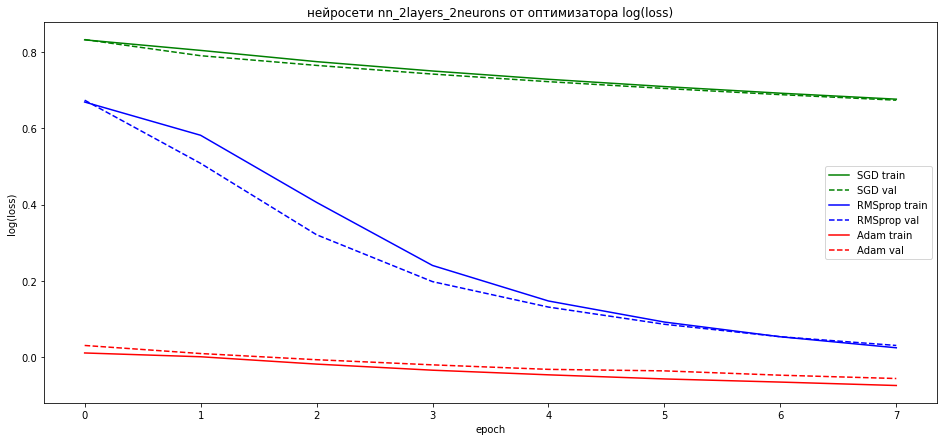

Epoch 1/7
235/235 [==============================] - 1s 4ms/step - loss: 2.0551 - accuracy: 0.2756 - val_loss: 1.7866 - val_accuracy: 0.3496
Epoch 2/7
235/235 [==============================] - 1s 4ms/step - loss: 1.5469 - accuracy: 0.4480 - val_loss: 1.3454 - val_accuracy: 0.5445
Epoch 3/7
235/235 [==============================] - 1s 4ms/step - loss: 1.1951 - accuracy: 0.6001 - val_loss: 1.0955 - val_accuracy: 0.6133
Epoch 4/7
235/235 [==============================] - 1s 4ms/step - loss: 1.0210 - accuracy: 0.6297 - val_loss: 0.9835 - val_accuracy: 0.6377
Epoch 5/7
235/235 [==============================] - 1s 4ms/step - loss: 0.9375 - accuracy: 0.6461 - val_loss: 0.9224 - val_accuracy: 0.6486
Epoch 6/7
235/235 [==============================] - 1s 4ms/step - loss: 0.8878 - accuracy: 0.6600 - val_loss: 0.8837 - val_accuracy: 0.6576
Epoch 7/7
235/235 [==============================] - 1s 4ms/step - loss: 0.8529 - accuracy: 0.6720 - val_loss: 0.8550 - val_accuracy: 0.6694
Epoch 1/7
235

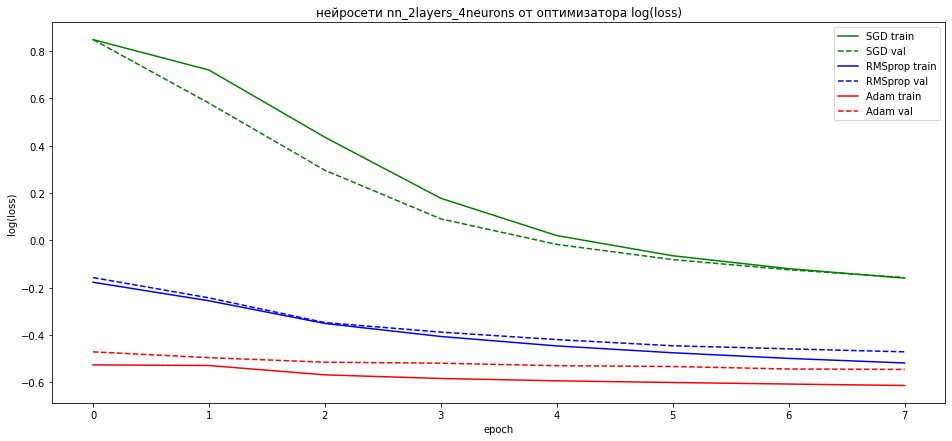

Epoch 1/7
235/235 [==============================] - 1s 5ms/step - loss: 1.8660 - accuracy: 0.3719 - val_loss: 1.4459 - val_accuracy: 0.5517
Epoch 2/7
235/235 [==============================] - 1s 5ms/step - loss: 1.1730 - accuracy: 0.6219 - val_loss: 0.9969 - val_accuracy: 0.6526
Epoch 3/7
235/235 [==============================] - 1s 5ms/step - loss: 0.9013 - accuracy: 0.6835 - val_loss: 0.8481 - val_accuracy: 0.6985
Epoch 4/7
235/235 [==============================] - 1s 5ms/step - loss: 0.7936 - accuracy: 0.7189 - val_loss: 0.7744 - val_accuracy: 0.7241
Epoch 5/7
235/235 [==============================] - 1s 5ms/step - loss: 0.7323 - accuracy: 0.7419 - val_loss: 0.7263 - val_accuracy: 0.7423
Epoch 6/7
235/235 [==============================] - 1s 5ms/step - loss: 0.6898 - accuracy: 0.7599 - val_loss: 0.6917 - val_accuracy: 0.7533
Epoch 7/7
235/235 [==============================] - 1s 5ms/step - loss: 0.6573 - accuracy: 0.7749 - val_loss: 0.6648 - val_accuracy: 0.7653
Epoch 1/7
235

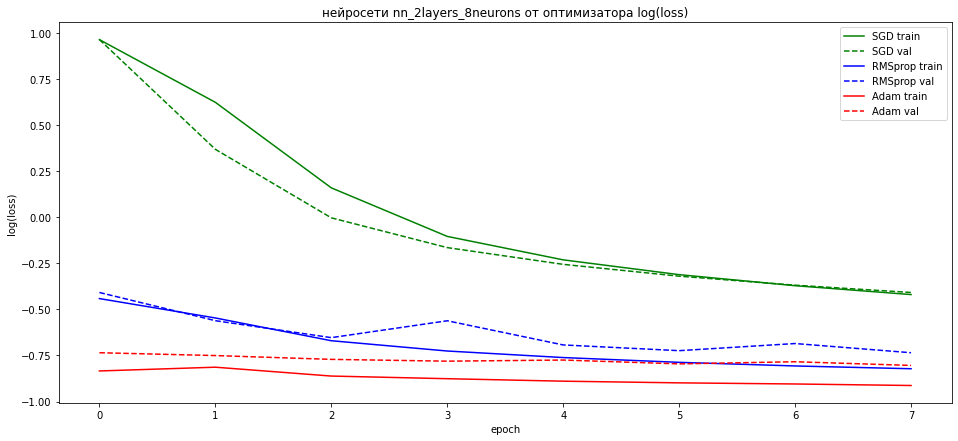

Epoch 1/7
235/235 [==============================] - 1s 5ms/step - loss: 1.4979 - accuracy: 0.5533 - val_loss: 1.0809 - val_accuracy: 0.6720
Epoch 2/7
235/235 [==============================] - 1s 5ms/step - loss: 0.9393 - accuracy: 0.7050 - val_loss: 0.8591 - val_accuracy: 0.7102
Epoch 3/7
235/235 [==============================] - 1s 4ms/step - loss: 0.7930 - accuracy: 0.7395 - val_loss: 0.7656 - val_accuracy: 0.7348
Epoch 4/7
235/235 [==============================] - 1s 5ms/step - loss: 0.7169 - accuracy: 0.7599 - val_loss: 0.7061 - val_accuracy: 0.7575
Epoch 5/7
235/235 [==============================] - 1s 5ms/step - loss: 0.6679 - accuracy: 0.7762 - val_loss: 0.6660 - val_accuracy: 0.7704
Epoch 6/7
235/235 [==============================] - 1s 4ms/step - loss: 0.6329 - accuracy: 0.7878 - val_loss: 0.6373 - val_accuracy: 0.7794
Epoch 7/7
235/235 [==============================] - 1s 4ms/step - loss: 0.6064 - accuracy: 0.7961 - val_loss: 0.6159 - val_accuracy: 0.7849
Epoch 1/7
235

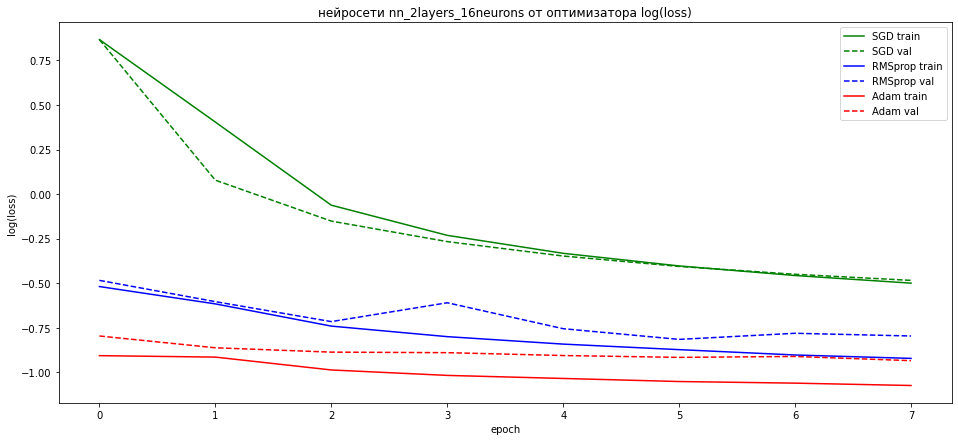

Epoch 1/7
235/235 [==============================] - 1s 5ms/step - loss: 1.5315 - accuracy: 0.5382 - val_loss: 1.0841 - val_accuracy: 0.6771
Epoch 2/7
235/235 [==============================] - 1s 5ms/step - loss: 0.9250 - accuracy: 0.7117 - val_loss: 0.8331 - val_accuracy: 0.7266
Epoch 3/7
235/235 [==============================] - 2s 8ms/step - loss: 0.7685 - accuracy: 0.7524 - val_loss: 0.7397 - val_accuracy: 0.7519
Epoch 4/7
235/235 [==============================] - 2s 6ms/step - loss: 0.6931 - accuracy: 0.7750 - val_loss: 0.6815 - val_accuracy: 0.7740
Epoch 5/7
235/235 [==============================] - 1s 5ms/step - loss: 0.6457 - accuracy: 0.7894 - val_loss: 0.6434 - val_accuracy: 0.7843
Epoch 6/7
235/235 [==============================] - 1s 5ms/step - loss: 0.6124 - accuracy: 0.7998 - val_loss: 0.6165 - val_accuracy: 0.7905
Epoch 7/7
235/235 [==============================] - 1s 5ms/step - loss: 0.5874 - accuracy: 0.8073 - val_loss: 0.5971 - val_accuracy: 0.7994
Epoch 1/7
235

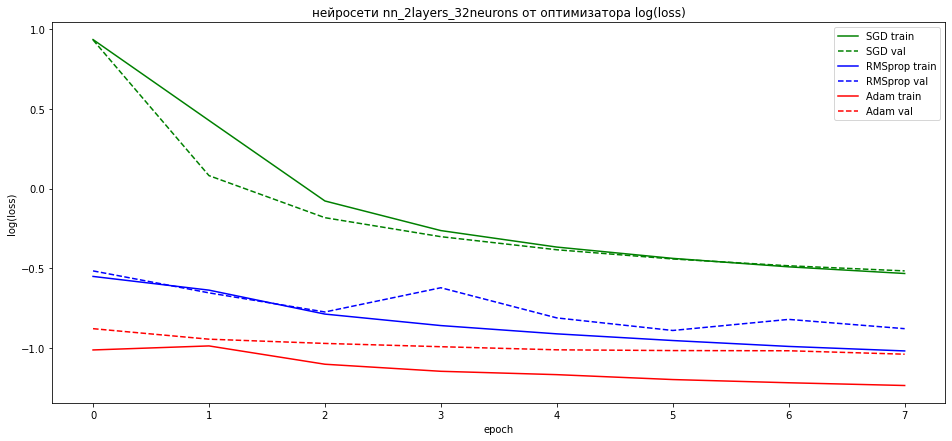

Epoch 1/7
235/235 [==============================] - 2s 6ms/step - loss: 1.4712 - accuracy: 0.5536 - val_loss: 1.0225 - val_accuracy: 0.6847
Epoch 2/7
235/235 [==============================] - 1s 6ms/step - loss: 0.8776 - accuracy: 0.7226 - val_loss: 0.8018 - val_accuracy: 0.7335
Epoch 3/7
235/235 [==============================] - 1s 6ms/step - loss: 0.7399 - accuracy: 0.7604 - val_loss: 0.7187 - val_accuracy: 0.7563
Epoch 4/7
235/235 [==============================] - 1s 6ms/step - loss: 0.6729 - accuracy: 0.7805 - val_loss: 0.6673 - val_accuracy: 0.7763
Epoch 5/7
235/235 [==============================] - 1s 6ms/step - loss: 0.6305 - accuracy: 0.7929 - val_loss: 0.6325 - val_accuracy: 0.7876
Epoch 6/7
235/235 [==============================] - 1s 6ms/step - loss: 0.6003 - accuracy: 0.8011 - val_loss: 0.6079 - val_accuracy: 0.7965
Epoch 7/7
235/235 [==============================] - 1s 6ms/step - loss: 0.5775 - accuracy: 0.8071 - val_loss: 0.5903 - val_accuracy: 0.7994
Epoch 1/7
235

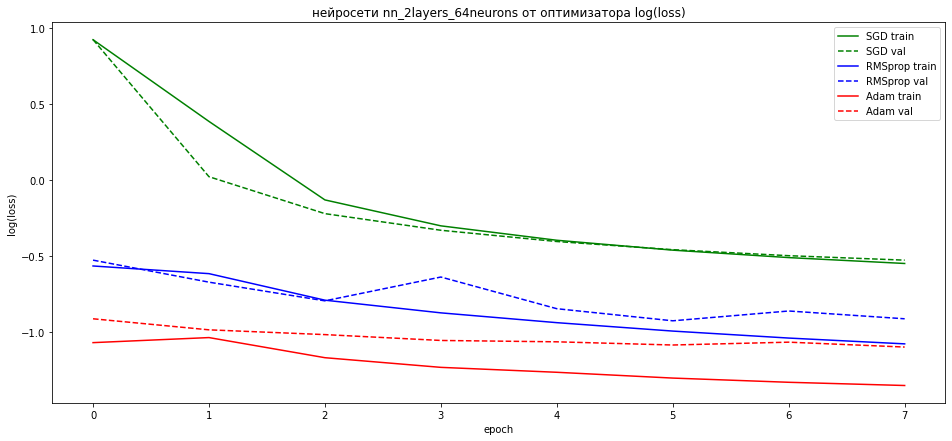

Epoch 1/7
235/235 [==============================] - 2s 7ms/step - loss: 1.3157 - accuracy: 0.6061 - val_loss: 0.9491 - val_accuracy: 0.6901
Epoch 2/7
235/235 [==============================] - 2s 7ms/step - loss: 0.8360 - accuracy: 0.7278 - val_loss: 0.7765 - val_accuracy: 0.7383
Epoch 3/7
235/235 [==============================] - 2s 7ms/step - loss: 0.7212 - accuracy: 0.7625 - val_loss: 0.7037 - val_accuracy: 0.7612
Epoch 4/7
235/235 [==============================] - 2s 7ms/step - loss: 0.6606 - accuracy: 0.7821 - val_loss: 0.6559 - val_accuracy: 0.7798
Epoch 5/7
235/235 [==============================] - 2s 7ms/step - loss: 0.6209 - accuracy: 0.7969 - val_loss: 0.6231 - val_accuracy: 0.7886
Epoch 6/7
235/235 [==============================] - 2s 7ms/step - loss: 0.5923 - accuracy: 0.8054 - val_loss: 0.6004 - val_accuracy: 0.7977
Epoch 7/7
235/235 [==============================] - 2s 7ms/step - loss: 0.5703 - accuracy: 0.8123 - val_loss: 0.5835 - val_accuracy: 0.8022
Epoch 1/7
235

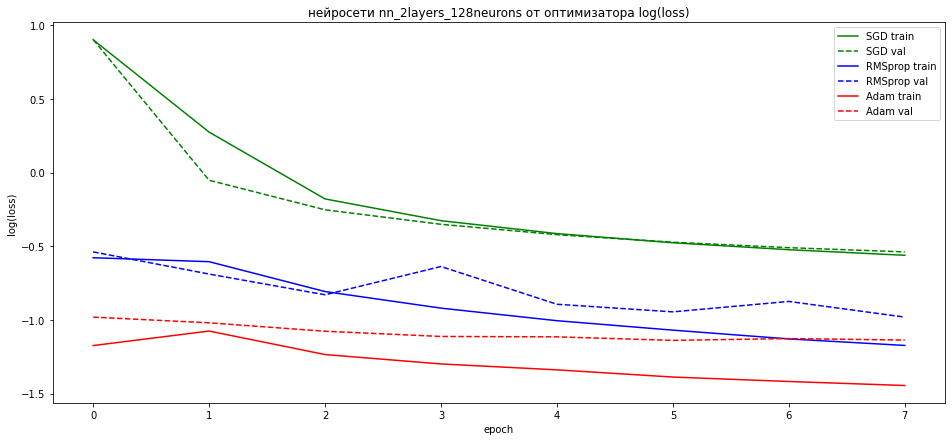

Epoch 1/7
235/235 [==============================] - 3s 10ms/step - loss: 1.2313 - accuracy: 0.6377 - val_loss: 0.8993 - val_accuracy: 0.7124
Epoch 2/7
235/235 [==============================] - 2s 10ms/step - loss: 0.7960 - accuracy: 0.7472 - val_loss: 0.7499 - val_accuracy: 0.7511
Epoch 3/7
235/235 [==============================] - 3s 11ms/step - loss: 0.6939 - accuracy: 0.7780 - val_loss: 0.6851 - val_accuracy: 0.7710
Epoch 4/7
235/235 [==============================] - 2s 10ms/step - loss: 0.6385 - accuracy: 0.7948 - val_loss: 0.6394 - val_accuracy: 0.7925
Epoch 5/7
235/235 [==============================] - 2s 10ms/step - loss: 0.6017 - accuracy: 0.8063 - val_loss: 0.6095 - val_accuracy: 0.7976
Epoch 6/7
235/235 [==============================] - 2s 10ms/step - loss: 0.5749 - accuracy: 0.8130 - val_loss: 0.5888 - val_accuracy: 0.8049
Epoch 7/7
235/235 [==============================] - 3s 11ms/step - loss: 0.5544 - accuracy: 0.8190 - val_loss: 0.5729 - val_accuracy: 0.8071
Epoch 

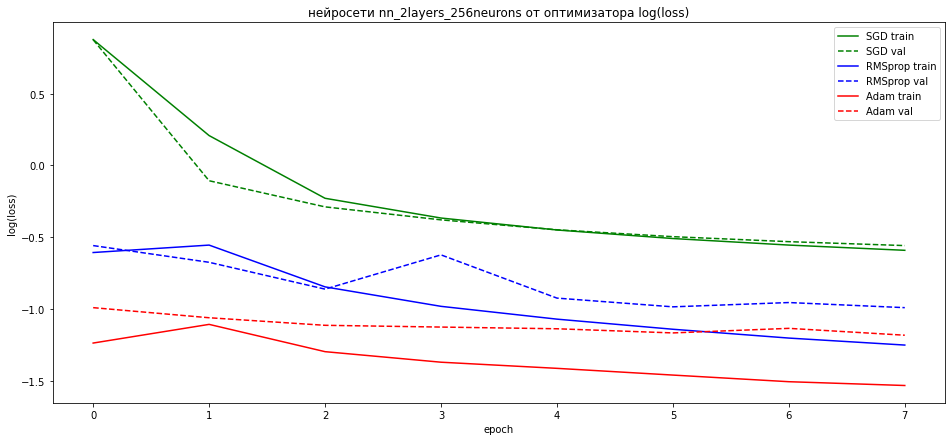

Epoch 1/7
235/235 [==============================] - 4s 16ms/step - loss: 1.2503 - accuracy: 0.6329 - val_loss: 0.8975 - val_accuracy: 0.7178
Epoch 2/7
235/235 [==============================] - 4s 16ms/step - loss: 0.7914 - accuracy: 0.7598 - val_loss: 0.7397 - val_accuracy: 0.7632
Epoch 3/7
235/235 [==============================] - 4s 16ms/step - loss: 0.6842 - accuracy: 0.7888 - val_loss: 0.6714 - val_accuracy: 0.7841
Epoch 4/7
235/235 [==============================] - 4s 16ms/step - loss: 0.6269 - accuracy: 0.8033 - val_loss: 0.6253 - val_accuracy: 0.8002
Epoch 5/7
235/235 [==============================] - 4s 16ms/step - loss: 0.5897 - accuracy: 0.8120 - val_loss: 0.5948 - val_accuracy: 0.8067
Epoch 6/7
235/235 [==============================] - 4s 16ms/step - loss: 0.5632 - accuracy: 0.8177 - val_loss: 0.5751 - val_accuracy: 0.8121
Epoch 7/7
235/235 [==============================] - 4s 16ms/step - loss: 0.5432 - accuracy: 0.8230 - val_loss: 0.5589 - val_accuracy: 0.8125
Epoch 

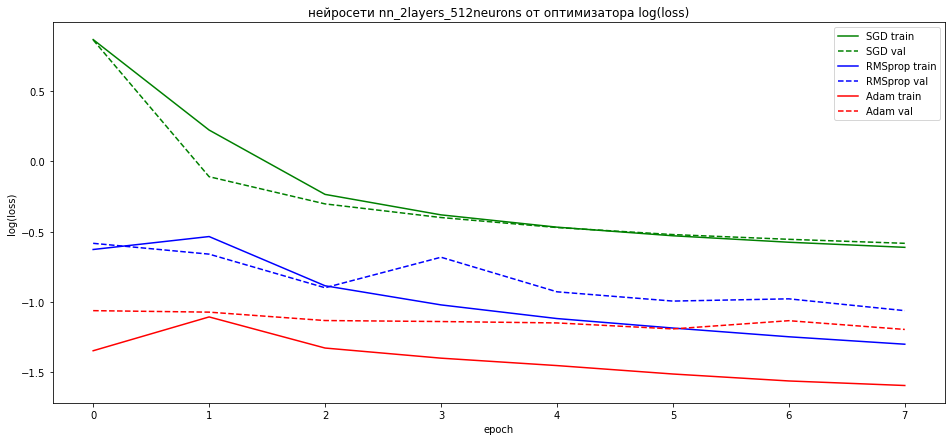

Epoch 1/7
235/235 [==============================] - 2s 6ms/step - loss: 1.3928 - accuracy: 0.5874 - val_loss: 0.9850 - val_accuracy: 0.6844
Epoch 2/7
235/235 [==============================] - 1s 6ms/step - loss: 0.8581 - accuracy: 0.7207 - val_loss: 0.7913 - val_accuracy: 0.7314
Epoch 3/7
235/235 [==============================] - 1s 6ms/step - loss: 0.7317 - accuracy: 0.7581 - val_loss: 0.7146 - val_accuracy: 0.7546
Epoch 4/7
235/235 [==============================] - 1s 6ms/step - loss: 0.6669 - accuracy: 0.7807 - val_loss: 0.6624 - val_accuracy: 0.7771
Epoch 5/7
235/235 [==============================] - 1s 6ms/step - loss: 0.6247 - accuracy: 0.7950 - val_loss: 0.6280 - val_accuracy: 0.7881
Epoch 6/7
235/235 [==============================] - 1s 6ms/step - loss: 0.5945 - accuracy: 0.8030 - val_loss: 0.6039 - val_accuracy: 0.7936
Epoch 7/7
235/235 [==============================] - 1s 6ms/step - loss: 0.5717 - accuracy: 0.8104 - val_loss: 0.5861 - val_accuracy: 0.8006
Epoch 1/7
235

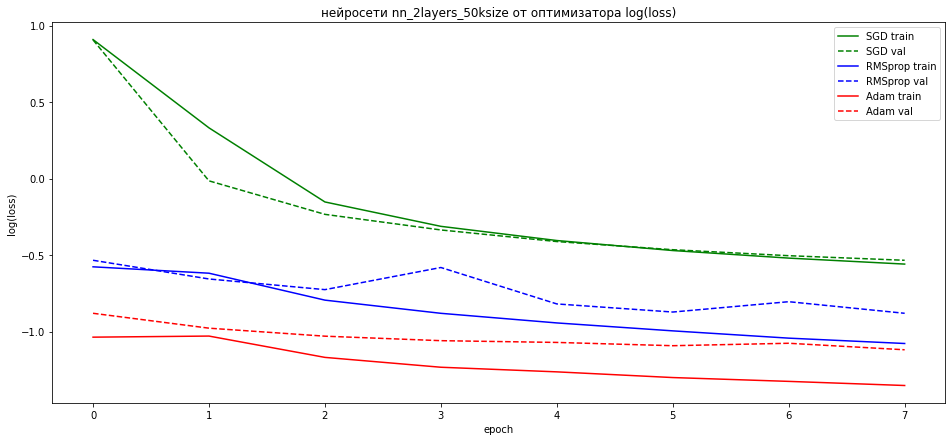

Epoch 1/7
235/235 [==============================] - 2s 6ms/step - loss: 1.6708 - accuracy: 0.4271 - val_loss: 1.1881 - val_accuracy: 0.6058
Epoch 2/7
235/235 [==============================] - 1s 6ms/step - loss: 0.9937 - accuracy: 0.6535 - val_loss: 0.8825 - val_accuracy: 0.6761
Epoch 3/7
235/235 [==============================] - 1s 6ms/step - loss: 0.8050 - accuracy: 0.7145 - val_loss: 0.7697 - val_accuracy: 0.7238
Epoch 4/7
235/235 [==============================] - 1s 6ms/step - loss: 0.7112 - accuracy: 0.7563 - val_loss: 0.6976 - val_accuracy: 0.7584
Epoch 5/7
235/235 [==============================] - 1s 6ms/step - loss: 0.6506 - accuracy: 0.7775 - val_loss: 0.6479 - val_accuracy: 0.7758
Epoch 6/7
235/235 [==============================] - 1s 6ms/step - loss: 0.6079 - accuracy: 0.7921 - val_loss: 0.6177 - val_accuracy: 0.7814
Epoch 7/7
235/235 [==============================] - 1s 6ms/step - loss: 0.5759 - accuracy: 0.8029 - val_loss: 0.5902 - val_accuracy: 0.7933
Epoch 1/7
235

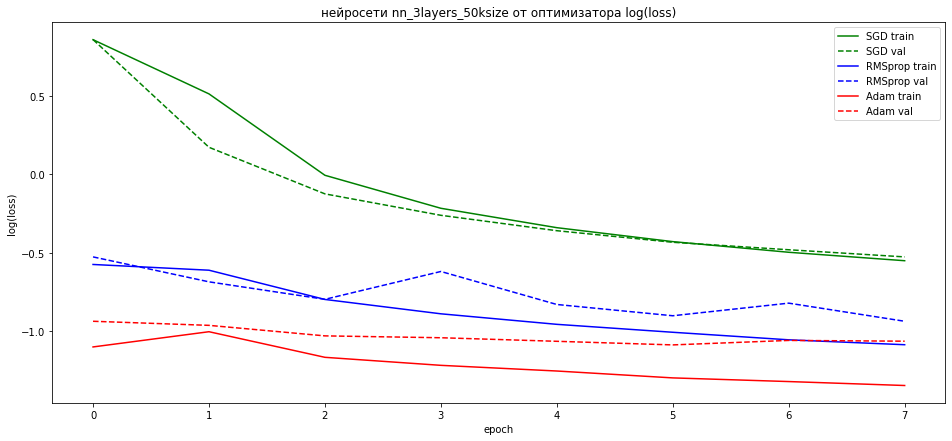

Epoch 1/7
235/235 [==============================] - 2s 7ms/step - loss: 2.0271 - accuracy: 0.3236 - val_loss: 1.6182 - val_accuracy: 0.5054
Epoch 2/7
235/235 [==============================] - 1s 6ms/step - loss: 1.1628 - accuracy: 0.6333 - val_loss: 0.8895 - val_accuracy: 0.6906
Epoch 3/7
235/235 [==============================] - 2s 6ms/step - loss: 0.7853 - accuracy: 0.7277 - val_loss: 0.8280 - val_accuracy: 0.7028
Epoch 4/7
235/235 [==============================] - 2s 7ms/step - loss: 0.6901 - accuracy: 0.7615 - val_loss: 0.6991 - val_accuracy: 0.7599
Epoch 5/7
235/235 [==============================] - 2s 6ms/step - loss: 0.6349 - accuracy: 0.7793 - val_loss: 0.6262 - val_accuracy: 0.7770
Epoch 6/7
235/235 [==============================] - 2s 7ms/step - loss: 0.6027 - accuracy: 0.7889 - val_loss: 0.6472 - val_accuracy: 0.7700
Epoch 7/7
235/235 [==============================] - 2s 7ms/step - loss: 0.5725 - accuracy: 0.7991 - val_loss: 0.5844 - val_accuracy: 0.7953
Epoch 1/7
235

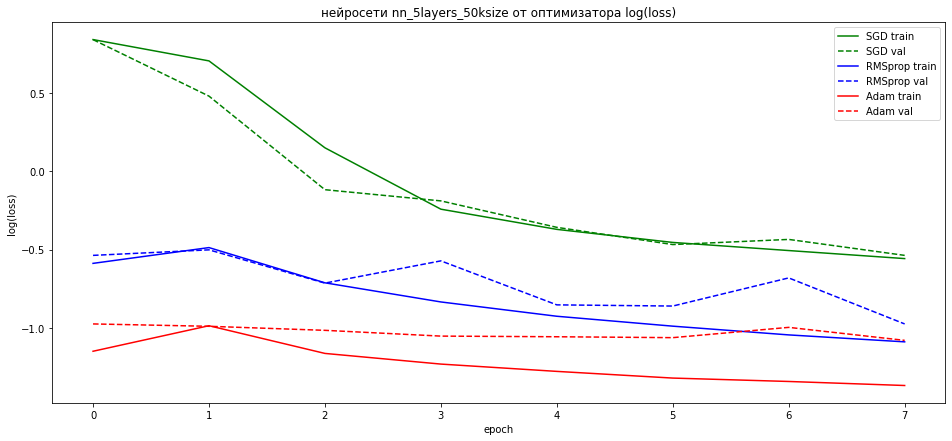

Epoch 1/7
235/235 [==============================] - 3s 9ms/step - loss: 2.2840 - accuracy: 0.1197 - val_loss: 2.2560 - val_accuracy: 0.1813
Epoch 2/7
235/235 [==============================] - 3s 11ms/step - loss: 2.1871 - accuracy: 0.2070 - val_loss: 2.1233 - val_accuracy: 0.2391
Epoch 3/7
235/235 [==============================] - 2s 7ms/step - loss: 2.0645 - accuracy: 0.2591 - val_loss: 2.0039 - val_accuracy: 0.2662
Epoch 4/7
235/235 [==============================] - 2s 7ms/step - loss: 1.9291 - accuracy: 0.2778 - val_loss: 1.8555 - val_accuracy: 0.2911
Epoch 5/7
235/235 [==============================] - 2s 7ms/step - loss: 1.7551 - accuracy: 0.3058 - val_loss: 1.6572 - val_accuracy: 0.3377
Epoch 6/7
235/235 [==============================] - 2s 7ms/step - loss: 1.5487 - accuracy: 0.3710 - val_loss: 1.4367 - val_accuracy: 0.4023
Epoch 7/7
235/235 [==============================] - 2s 7ms/step - loss: 1.3110 - accuracy: 0.4830 - val_loss: 1.2695 - val_accuracy: 0.4994
Epoch 1/7
23

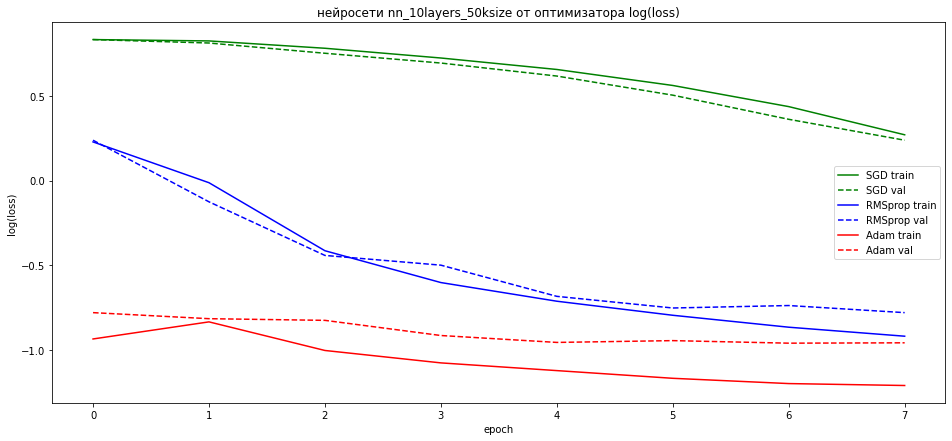

In [62]:
# ячейка отрабатывает не очень быстро (больше минуты локально и больше 10 в колабе)
trained_models = {}
colors = ['g', 'b', 'r']
num_epochs = 7
batch_size = 256
epoch = np.arange(num_epochs+1)

for name, model in models.items():
    plt.figure(figsize=(16, 7))
    for i, i_optimizer in enumerate(my_optimizers):
        model.compile(
        optimizer=i_optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
        # вычисляем ошибку модели без обучения
        h0_train = model.evaluate(X_train, y_train, verbose=0)
        h0_val = model.evaluate(X_test, y_test, verbose=0)

        # проводим обучение модели 
        h = model.fit(X_train, y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        verbose=1)

        # записываем обученную модель в словарь
        model_name = f'{name}_{i_optimizer.get_config()["name"]}'
        trained_models[model_name] = model

    # картинки
    
        plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
                  '-', c=colors[i],
                  label=model.optimizer.get_config()['name'] + ' train')
        plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
                  '--', c=colors[i],
                  label=model.optimizer.get_config()['name'] + ' val')
    print('=' * 20)

    plt.legend()
    plt.title(f'нейросети {name} от оптимизатора log(loss)')
    plt.xlabel('epoch')
    plt.ylabel('log(loss)')
    plt.show()

### 5. Интерпретация результатов

Теперь можно посмотреть на наших чемпионов по точности на тестовых данных:

In [65]:

ratings = {k : v for k, v in sorted({'_'.join(name.split('_')[:-1]) + '_Adam' : float(str(model.metrics[1].result())[10:15]) for name, model in trained_models.items()}.items(), key=lambda item: item[1], reverse=True)}
ratings


{'nn_2layers_512neurons_Adam': 0.892,
 'nn_2layers_256neurons_Adam': 0.891,
 'nn_2layers_128neurons_Adam': 0.886,
 'nn_2layers_64neurons_Adam': 0.883,
 'nn_2layers_50ksize_Adam': 0.883,
 'nn_5layers_50ksize_Adam': 0.88,
 'nn_3layers_50ksize_Adam': 0.877,
 'nn_2layers_32neurons_Adam': 0.875,
 'nn_10layers_50ksize_Adam': 0.871,
 'nn_2layers_16neurons_Adam': 0.861,
 'nn_2layers_8neurons_Adam': 0.845,
 'nn_2layers_4neurons_Adam': 0.801,
 'nn_2layers_2neurons_Adam': 0.619}

Первые 3 сети - с очень большим, относительно прочих, числом параметров. Причём, что интересно, увеличение количества нейронов с 256 до 512 не дало улучшения метрики.
Если смотреть на количество слоёв, то с текущими параметрами лучше других себя показали 2слойные и 5слойные сети.
В ячейке выше вывел только результаты оптимизатора Adam, поскольку он превосходит остальные на любых параметрах и архитектурах.

Итак, качество предсказания увеличивают:
1. Выбор оптимизатора Adam  
2. Увеличение количества нейронов  
3. Выбор 2х и 5ти слойной архитектуры  


Для дальнейшей работы выберу модель с 2 слоями и 64 нейронами на скрытом слое.

### 6. Визуализация работы выбранной модели

Чтобы не ждать выполнения ячейки с грид серчём, обучу отдельно новую модель с выбранными параметрами.

In [66]:
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
    ])
model.compile(
        optimizer=optimizers.adam_v2.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
h = model.fit(X_train, y_train, epochs=15, batch_size=256, validation_data=(X_test, y_test), verbose=0)


313/313 [==============================] - 1s 2ms/step
(10000, 10)


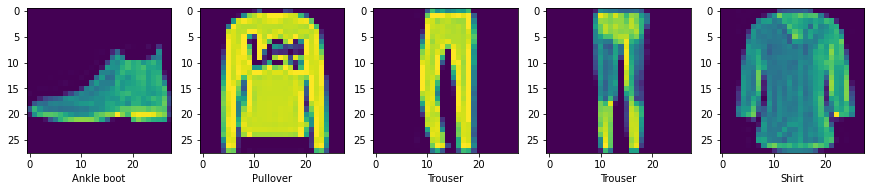

In [67]:
N = 5
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(X_test[i,:].reshape(28, 28))
  plt.xlabel(dict_labels[y_pred_class[i]])
plt.show()  

Либо в виде датафрейма:

In [68]:
ans = pd.DataFrame(y_pred, columns=[dict_labels[i] for i in range(10)])
ans = ans.merge(pd.DataFrame(y_test, columns=[dict_labels[i] + '+' for i in range(10)]), left_index=True, right_index=True)
ans = ans.apply(lambda x: round(x, 3))
ans.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot,T-shirt/top+,Trouser+,Pullover+,Dress+,Coat+,Sandal+,Shirt+,Sneaker+,Bag+,Ankle boot+
0,0.002,0.000,0.009,0.003,0.003,0.756,0.122,0.949,0.417,0.993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.527,0.000,1.000,0.000,0.993,0.000,0.974,0.000,0.002,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.847,1.000,0.060,0.324,0.053,0.000,0.028,0.000,0.011,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.462,1.000,0.094,0.828,0.114,0.000,0.082,0.001,0.016,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.971,0.028,0.917,0.611,0.783,0.000,0.996,0.000,0.620,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 7. Матрица ошибок

In [69]:
y_test_class = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_pred_class, y_test_class, normalize=None)
cm

array([[823,   1,  11,  14,   0,   0, 118,   0,   5,   1],
       [  3, 966,   0,   7,   0,   0,   1,   0,   0,   0],
       [ 18,   1, 765,  11,  78,   0,  81,   0,   4,   0],
       [ 40,  23,  19, 919,  46,   1,  36,   0,   9,   0],
       [  4,   4, 122,  18, 798,   0,  78,   0,   4,   0],
       [  1,   0,   0,   1,   0, 949,   0,  18,   4,   8],
       [100,   3,  80,  24,  73,   0, 672,   0,   5,   1],
       [  0,   0,   0,   0,   0,  34,   0, 963,   5,  54],
       [ 11,   2,   3,   6,   5,   2,  14,   0, 964,   0],
       [  0,   0,   0,   0,   0,  14,   0,  19,   0, 936]])

Или более наглядно - в виде heatmap:

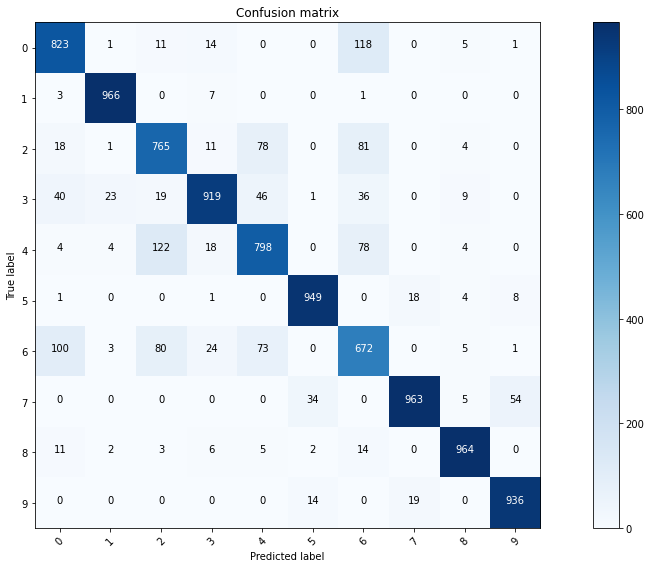

In [70]:
classes = list(range(10))
plt.subplots(figsize=(15, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Чтобы посчитать метрики, вспомним определения:  
    Точность = TP / (TP + FP)  
    Полнота = TP / (TP + FN)

In [71]:
precisions = []
recalls = []
for i_class in classes:
    precision = cm[i_class][i_class] / sum([cm[i][i_class] for i in classes])
    recall = cm[i_class][i_class] / sum(cm[i_class])
    precisions.append(precision)
    recalls.append(recall)


В виде датафрейма:

In [72]:
metrics = pd.DataFrame(precisions, columns=['Точность'])
metrics['Полнота'] = recalls
metrics = metrics.apply(lambda x: round(x, 3))
metrics = metrics.reset_index().rename(columns={'index' : 'Класс'})
metrics['Класс'] = metrics['Класс'].map(dict_labels)
metrics

,Класс,Точность,Полнота
0,T-shirt/top,0.823,0.846
1,Trouser,0.966,0.989
2,Pullover,0.765,0.799
3,Dress,0.919,0.841
4,Coat,0.798,0.776
5,Sandal,0.949,0.967
6,Shirt,0.672,0.701
7,Sneaker,0.963,0.912
8,Bag,0.964,0.957
9,Ankle boot,0.936,0.966


Или на графике:

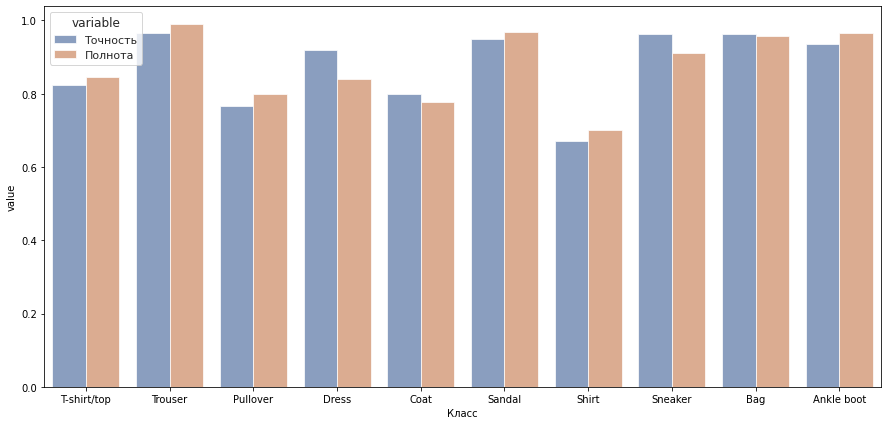

In [73]:
m1 = metrics.melt(id_vars='Класс')
plt.subplots(figsize=(15, 7))
sns.set_theme(style="whitegrid")
sns.barplot(data=m1, x='Класс', y='value', hue='variable', alpha=0.7)

Модель хорошо определяет штаны, все виды обуви и сумки и плохо справляется с рубашками и другой верхней одеждой.